In [224]:
library(tidyverse)
library(repr)
library(tidymodels)

In [225]:
heart_disease_data <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [250]:
heart_disease_selected <- heart_disease_data %>% 
    select(thalach, chol, num) %>% 
    mutate(num = factor(num))
heart_disease_selected %>% head(10)

thalach,chol,num
<dbl>,<dbl>,<fct>
150,233,0
108,286,2
129,229,1
187,250,0
172,204,0
178,236,0
160,268,3
163,354,0
147,254,2


thalach,chol,num,heart_disease
<dbl>,<dbl>,<fct>,<lgl>
150,233,0,FALSE
108,286,2,TRUE
129,229,1,TRUE
187,250,0,FALSE
172,204,0,FALSE
178,236,0,FALSE
160,268,3,TRUE
163,354,0,FALSE
147,254,2,TRUE


[1] "Number of rows with missing data: 0"


heart_disease,n
<lgl>,<int>
FALSE,123
TRUE,104


thalach_mean,chol_mean
<dbl>,<dbl>
149.7357,246.3656


    thalach           chol       num     heart_disease  
 Min.   : 71.0   Min.   :126.0   0:123   Mode :logical  
 1st Qu.:136.0   1st Qu.:211.0   1: 45   FALSE:123      
 Median :153.0   Median :242.0   2: 26   TRUE :104      
 Mean   :149.7   Mean   :246.4   3: 25                  
 3rd Qu.:165.5   3rd Qu.:273.5   4:  8                  
 Max.   :202.0   Max.   :564.0                          

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



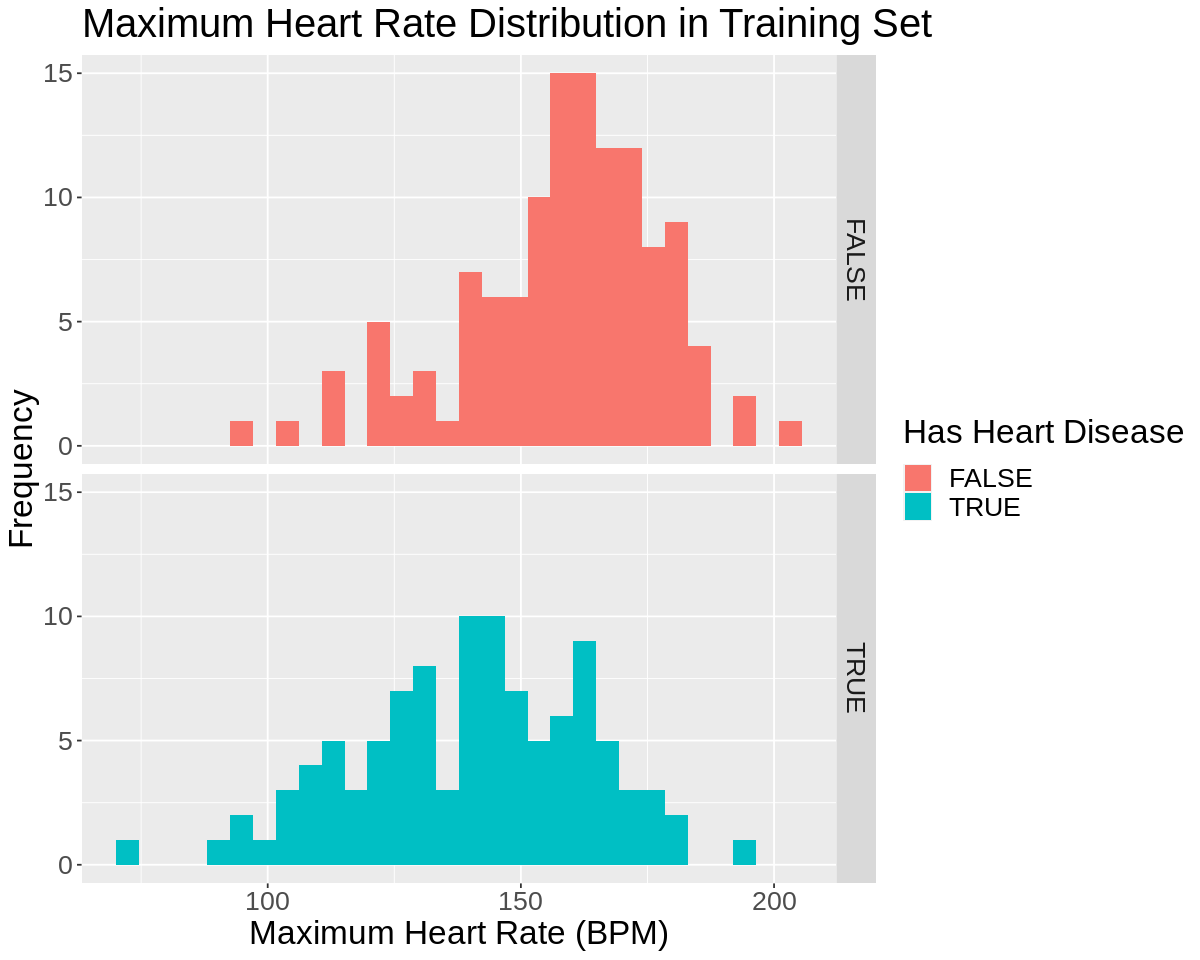

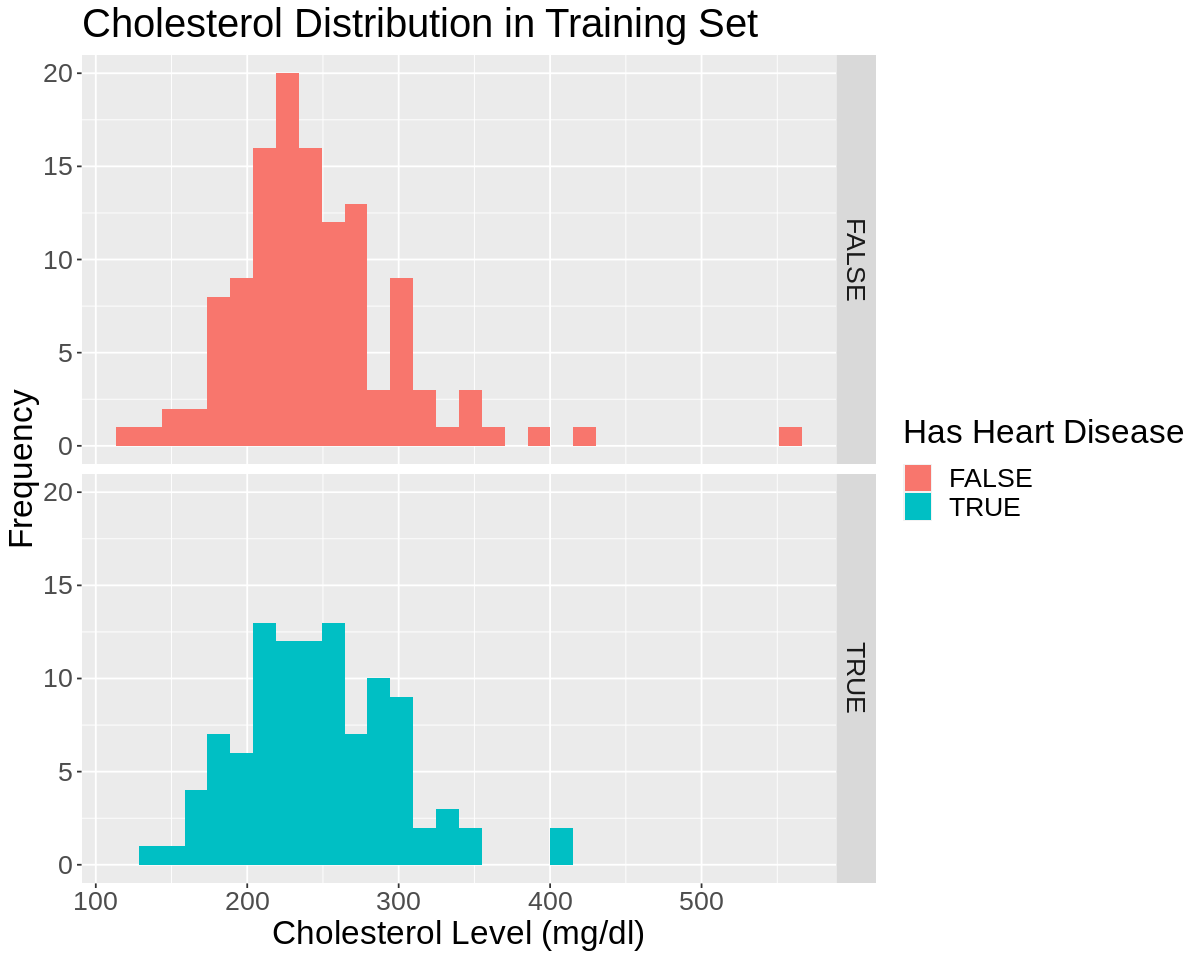

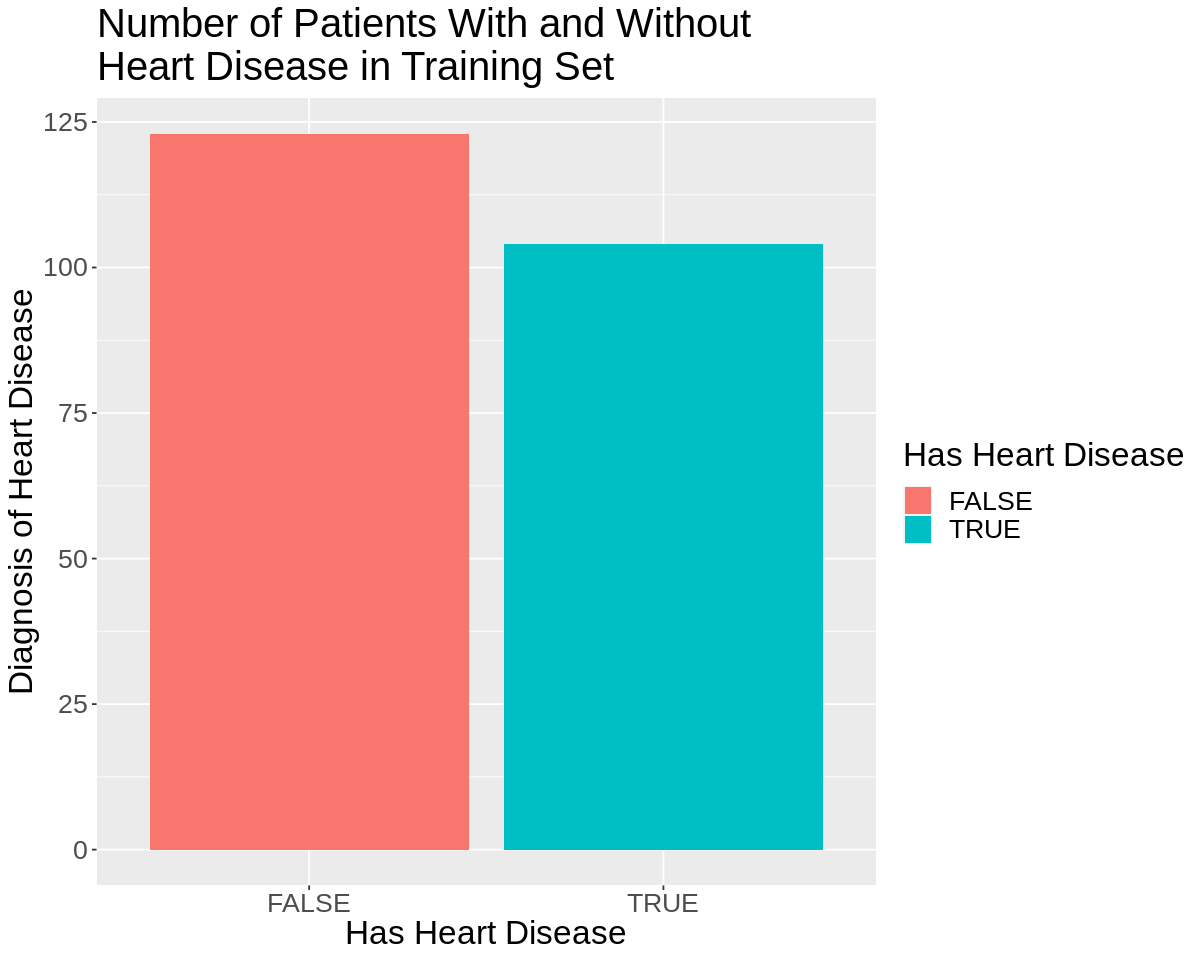

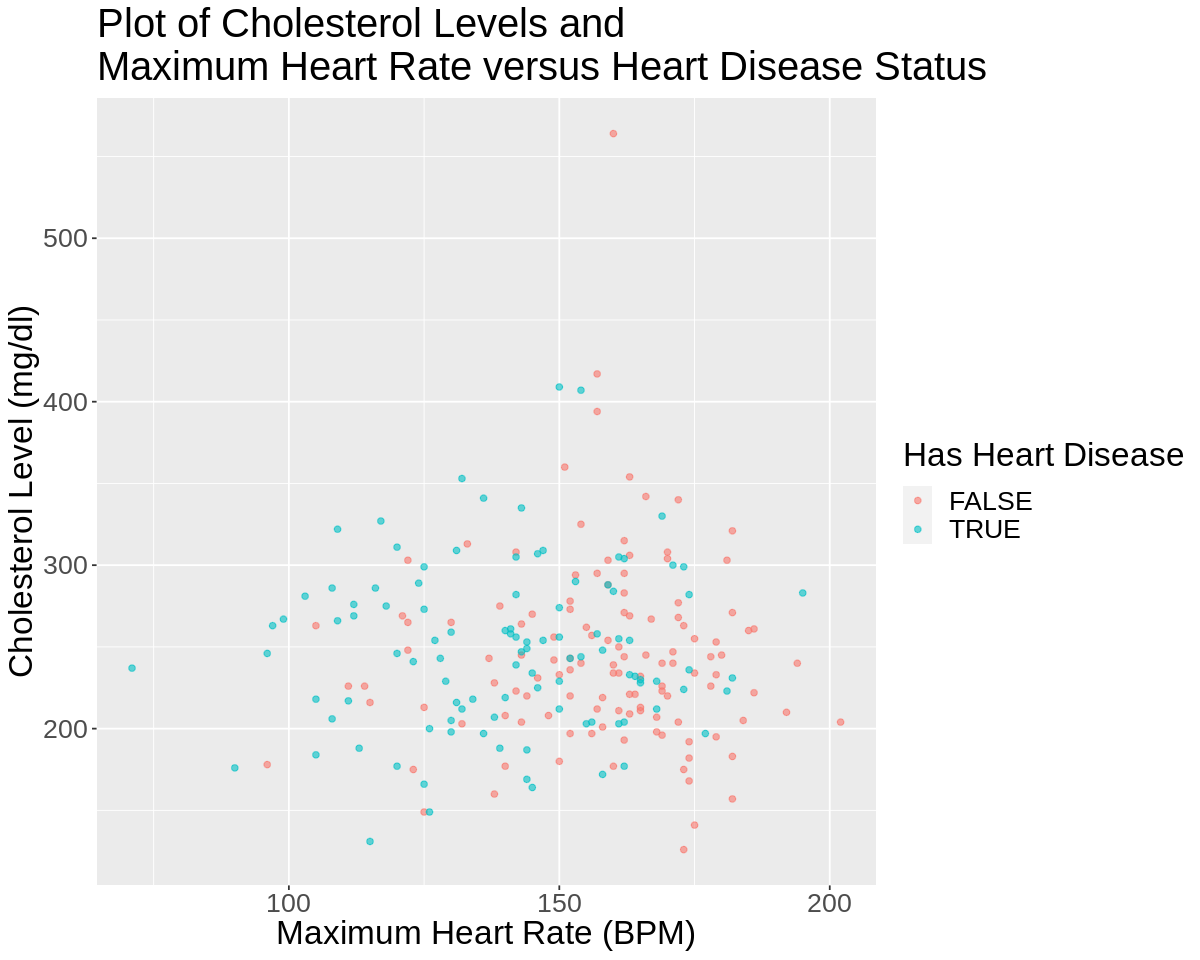

In [251]:
options(repr.plot.width = 10, repr.plot.height = 8)
set.seed(1000)

# add heart_disease column. TRUE if patient has disease, FALSE otherwise. 
heart <- heart_disease_selected %>% 
    mutate(heart_disease = (num != 0)) 

# show 10 rows of the data
heart %>% head(10)


# number of missing data points 
heart_missing <- heart %>% 
    filter(is.na(thalach) | thalach == "?" | is.na(chol) | chol == "?" | is.na(num) | num == "?") %>% 
    nrow()

print(paste("Number of rows with missing data:" , toString(heart_missing))) # 0


# split data into train and test sets 
heart_split <- initial_split(heart, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

# number of observations of each class (heart_disease == {TRUE, FALSE}) in training set 
heart_train_summary <- heart_train %>% 
    group_by(heart_disease) %>% 
    summarize(n = n())

heart_train_summary

# calculate mean of each predictors (thalach, chol) 
heart_train_predictors_mean <- heart_train %>% 
    select(thalach, chol) %>% 
    summarize(thalach_mean = mean(thalach), chol_mean = mean(chol))

heart_train_predictors_mean
summary(heart_train)

# histogram of thalach distribution in training set 
heart_train_thalach_hist <- heart_train %>% 
    select(thalach, heart_disease) %>%
    mutate(n = n()) %>%
    ggplot(aes(x = thalach, fill = heart_disease)) + 
    geom_histogram() + 
    facet_grid(rows = vars(heart_disease)) +
    labs(x = "Maximum Heart Rate (BPM)", y = "Frequency", fill = "Has Heart Disease", title = "Maximum Heart Rate Distribution in Training Set") +
    theme(text = element_text(size = 20))

heart_train_thalach_hist


# histogram of chol distribution in training set 
heart_train_chol_hist <- heart_train %>% 
    select(chol, heart_disease) %>% 
    mutate(n = n()) %>% 
    ggplot(aes(x = chol, fill = heart_disease)) + 
    geom_histogram() +
    facet_grid(rows = vars(heart_disease)) + 
    labs(x = "Cholesterol Level (mg/dl)", y = "Frequency", fill = "Has Heart Disease", title = "Cholesterol Distribution in Training Set") +
    theme(text = element_text(size = 20))

heart_train_chol_hist



# Side-
heart_train_summary_plot <- ggplot(heart_train_summary, aes(x = heart_disease, y = n, fill = heart_disease)) +
    geom_bar(stat="identity") +
    labs(x = "Has Heart Disease", y = "Diagnosis of Heart Disease", fill = "Has Heart Disease", title = "Number of Patients With and Without \nHeart Disease in Training Set") +
    theme(text = element_text(size = 20))

heart_train_summary_plot

# scatterplot of chol vs max heart rate (thalach) vs heart_disease status
heart_train_plot <- ggplot(heart_train, aes(x = thalach, y = chol, color = heart_disease)) +
    geom_point(alpha = 0.6) +
    labs(x = "Maximum Heart Rate (BPM)", y  = "Cholesterol Level (mg/dl)", color = "Has Heart Disease", title = "Plot of Cholesterol Levels and \nMaximum Heart Rate versus Heart Disease Status") +
    theme(text = element_text(size = 20))

heart_train_plot